In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Ler arquivo

In [10]:
turbina = pd.read_csv('T1.csv')

#redefinindo nome das colunas
turbina.columns = ['Data/Hora', 'ActivePower(kw)', 'WindSpeed(m/s)', 'CurvaTeórica(kwh)', 'DirecaoVento(°)']

del turbina['DirecaoVento(°)']

# Alterando tipo do dado
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,ActivePower(kw),WindSpeed(m/s),CurvaTeórica(kwh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## Plotando os dados em um gráfico

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

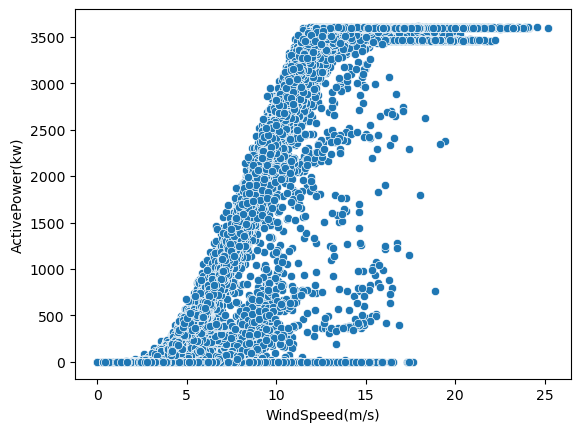

In [11]:
# estrutura: sns.scatterplot(data=nome da tabela aqui, x= 'coluna aqui', y= 'coluna aqui')
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y= 'ActivePower(kw)')

   ## Plotando os dados em um gráfico - Teórica

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeórica(kwh)'>

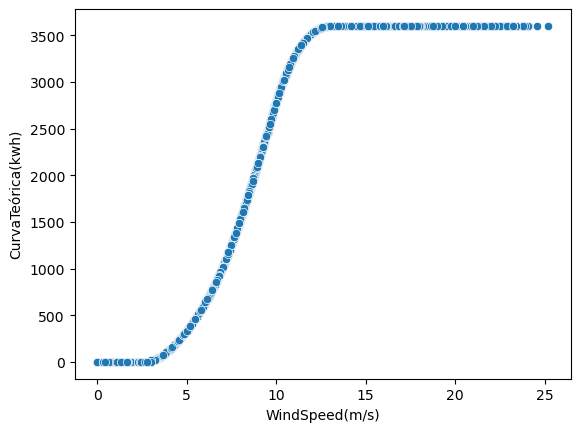

In [12]:
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y= 'CurvaTeórica(kwh)')

## Criando limites "aceitáveis"

In [46]:
#Pegar uma vareável como potencial real e atribuir o 'ActivePower(kw)' a ela e transformar em lista
pot_real = turbina['ActivePower(kw)'].tolist()
# Mesma coisa com a Curva teórica
pot_teorica = turbina['CurvaTeórica(kwh)'].tolist()

# Criar lista de potência máxima e potência miníma. Sendo Máx= CurvaTeorica + 5%. Min= CurvaTeorica - 5%

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
    
for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        
print(dentro_limite.count('Dentro')/len(dentro_limite))




0.37286760340391845


## Adicionando lista "dentro_limite" ao dataframe:

In [48]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower(kw),WindSpeed(m/s),CurvaTeórica(kwh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


## Plotando novamente o gráfico

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

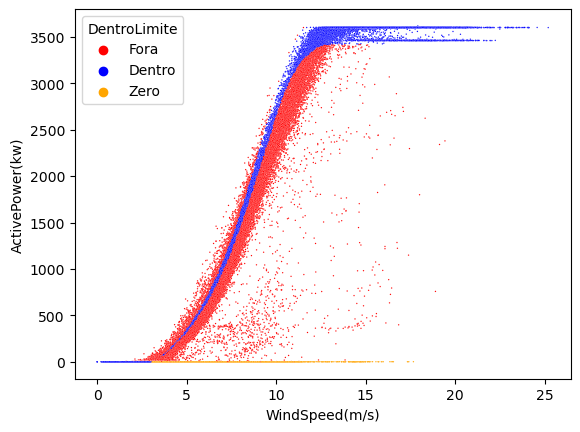

In [57]:
#criando paleta de cores
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}
# 'hue' parametro para separar por cores. 's' define tamanho das bolinhas do gráfico. 'palette' é para aplicar o parametro de cores.
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y= 'ActivePower(kw)', hue='DentroLimite', s=1, palette=cores)
